---
title: cheg325 homework 5 SIS 9.9
author: k. wodehouse
date: today
format:
    html:
        self-contained: true
---

using the data we need to relate the regular solution theory parameters to our van laar parameters (alpha and beta) usig this equation

$$
\alpha = A_{12} = \frac{V_1}{RT} (\delta_1 - \delta_2)^2
$$

$$
\beta = A_{21} = \frac{V_2}{RT} (\delta_1 - \delta_2)^2
$$

now calculating them up with the data in the table and the illustration where they calculate it for the trimethyl. also, arbitrarily let benzene be component 1

In [2]:
from scipy.constants import R
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

T = 273 + 55.0
R *= 0.239006 # convert to calories
V1 = 89.0
V2 = 165.0
delta1 = 9.2
delta2 = 6.93

alpha = (V1/(R*T))*(delta1 - delta2)**2
beta = (V2/(R*T))*(delta1 - delta2)**2

print(f"alpha: {alpha:.4f}")
print(f"beta: {beta:.4f}")

def van_laar1(x1, alpha, beta):
    return alpha / (1 + (alpha/beta) * (x1/(1-x1)))**2

def van_laar2(x1, alpha, beta):
    return beta / (1 + (beta/alpha) * ((1-x1)/(x1)))**2

alpha: 0.7036
beta: 1.3044


not looking too hot but let's plot with the experimental data and see

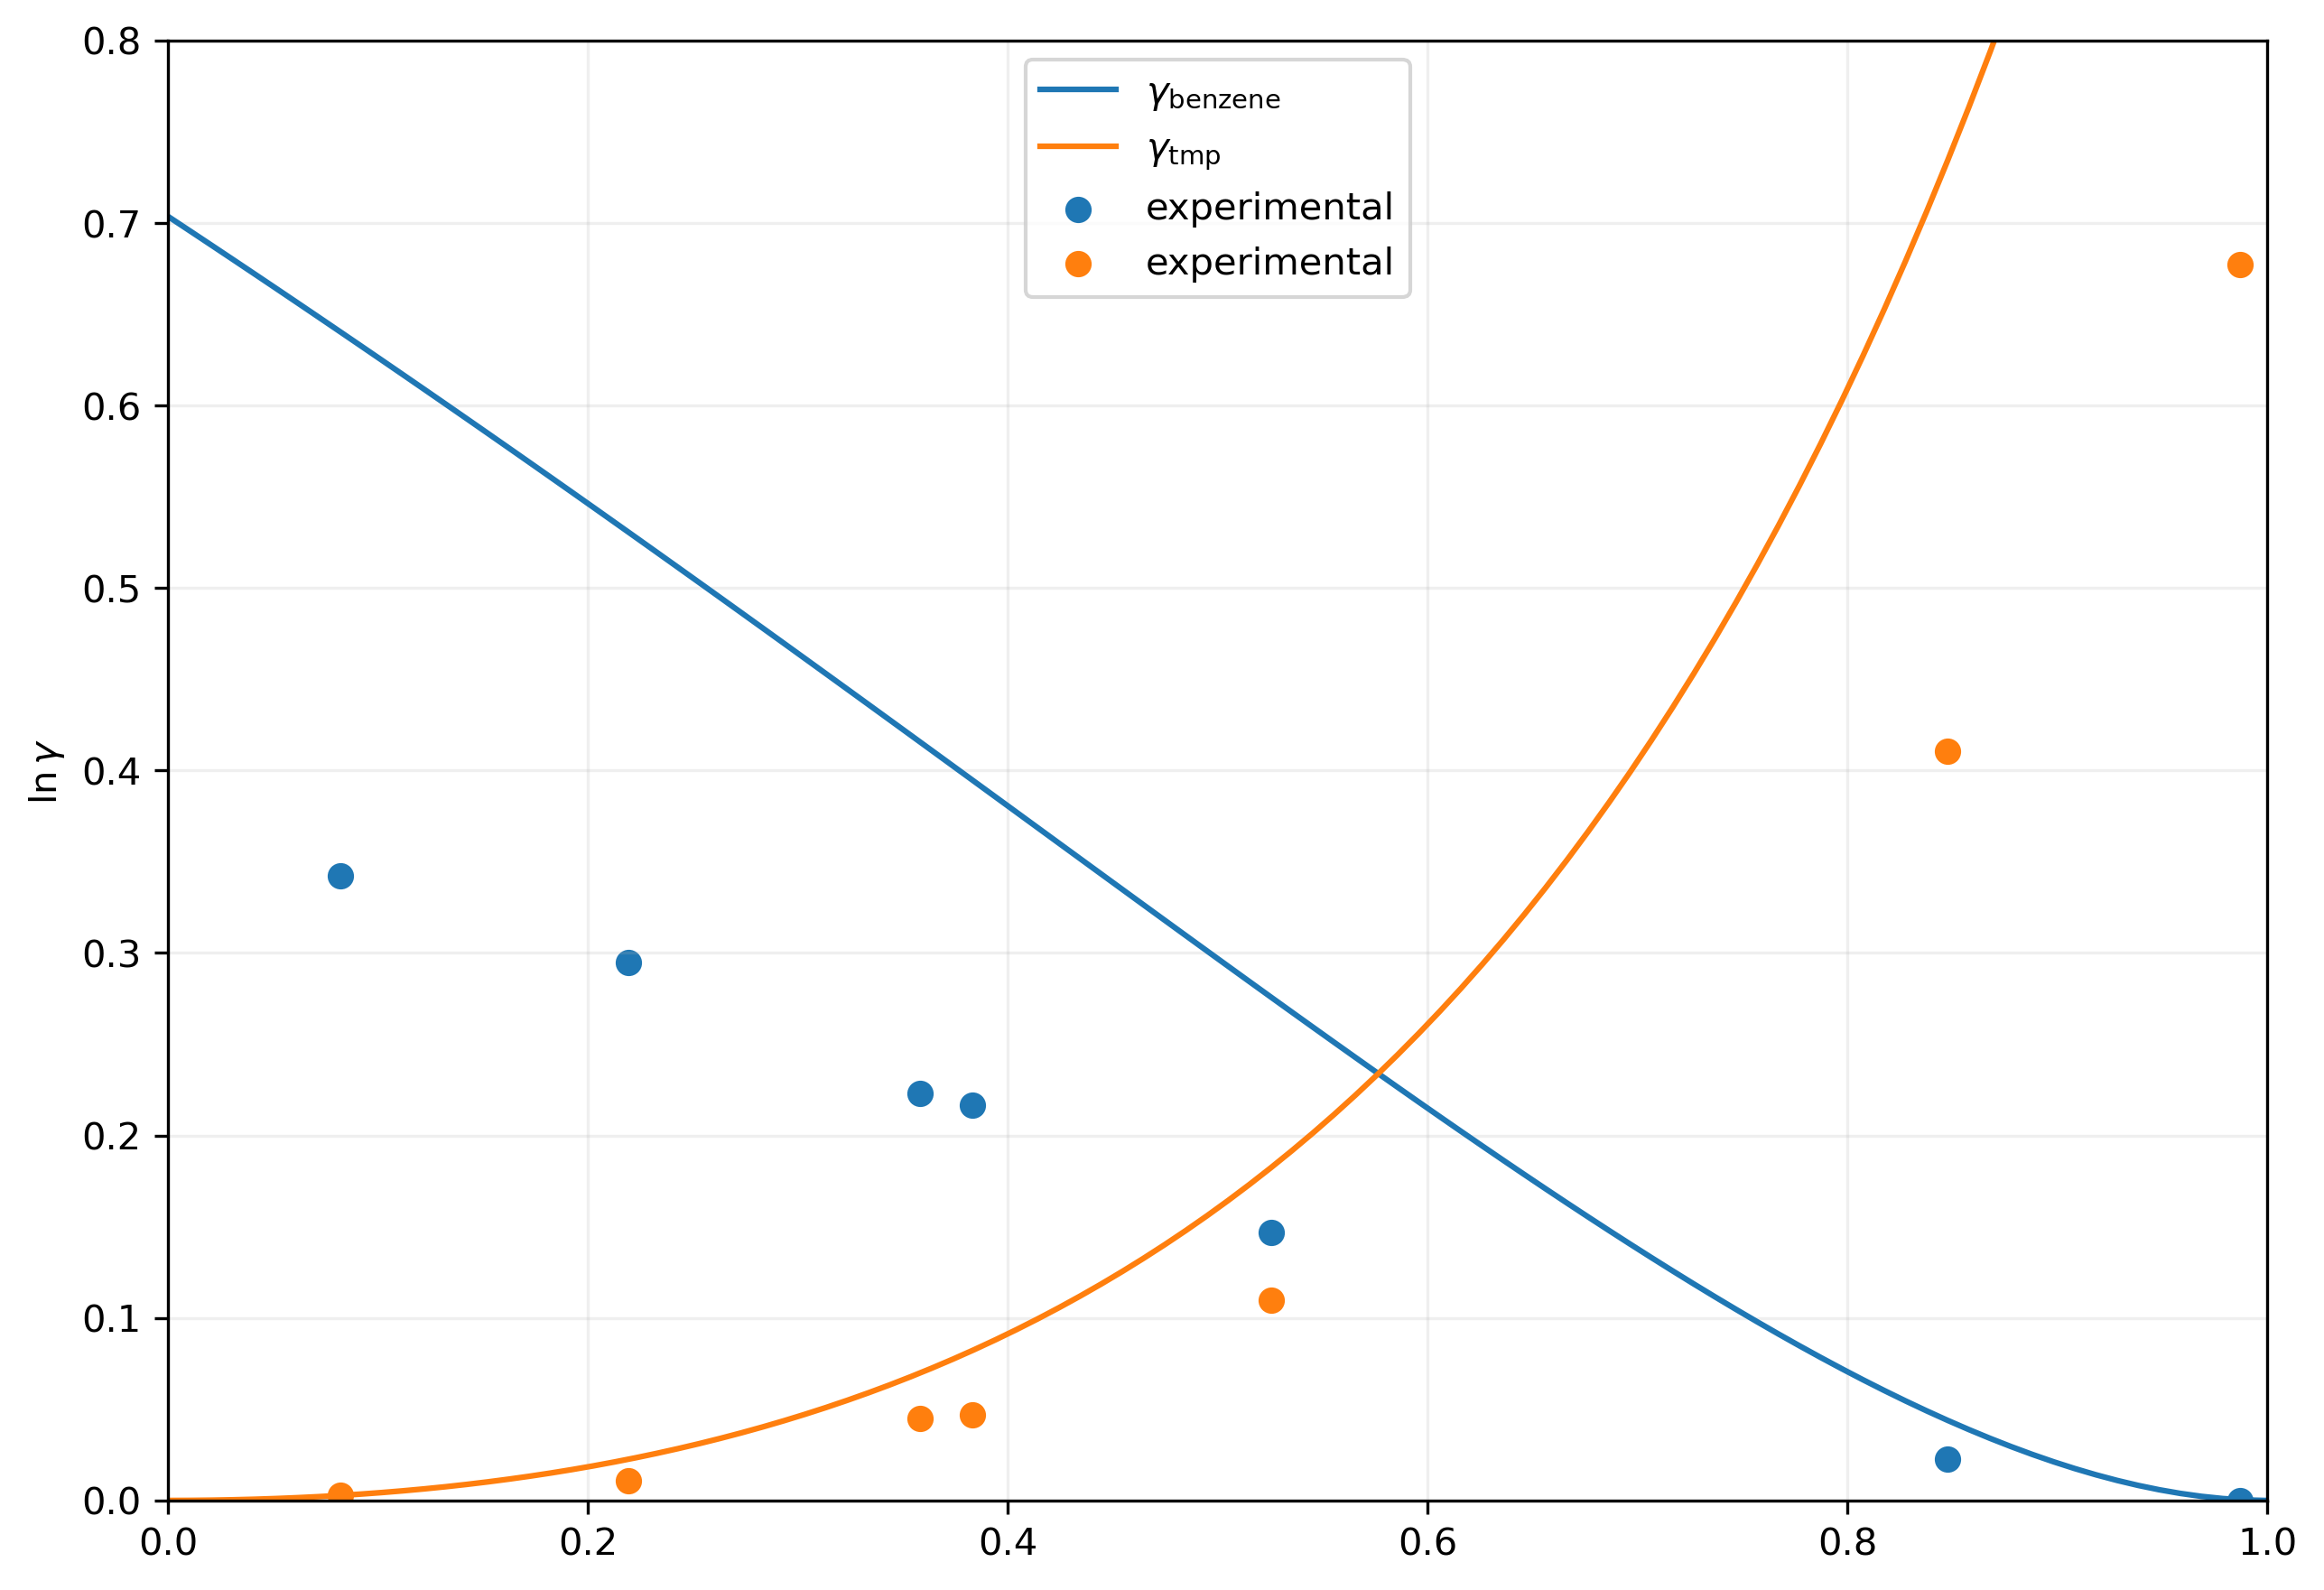

In [3]:
df = pd.read_csv('data.txt', sep=' ')
fig, ax = plt.subplots(figsize=(10,7), dpi=300, subplot_kw={'xlim':(0,1), 'ylim':(0,0.8), 'ylabel':'$\ln \gamma$'})

x1 = np.linspace(0.001,0.999,100)
y1 = van_laar1(x1, alpha, beta) 
y2 = van_laar2(x1, alpha, beta) 

plt.plot(x1, y1)
plt.plot(x1, y2)


plt.scatter(df['xb'], np.log(df['gb']))
plt.scatter(df['xb'], np.log(df['gtmp']))



ax.legend([r'$\gamma_{\text{benzene}}$', r'$\gamma_{\text{tmp}}$', 'experimental', 'experimental'])
ax.grid(alpha=0.2)

regular solution theory seems pretty far from experiment.

# (B)

$\alpha$ and $\beta$ correspond to our infinite dilution $\ln \gamma$ values. could be just visually guessed but i did it by measuring pixels in the graph. then beta can come from the data given in the textbook

In [4]:
alpha = (0.4/294)*304
beta = 0.6870
print(f'alpha: {alpha:.4f}\nbeta: {beta:.4f}')

alpha: 0.4136
beta: 0.6870


comparing to our experimental data now

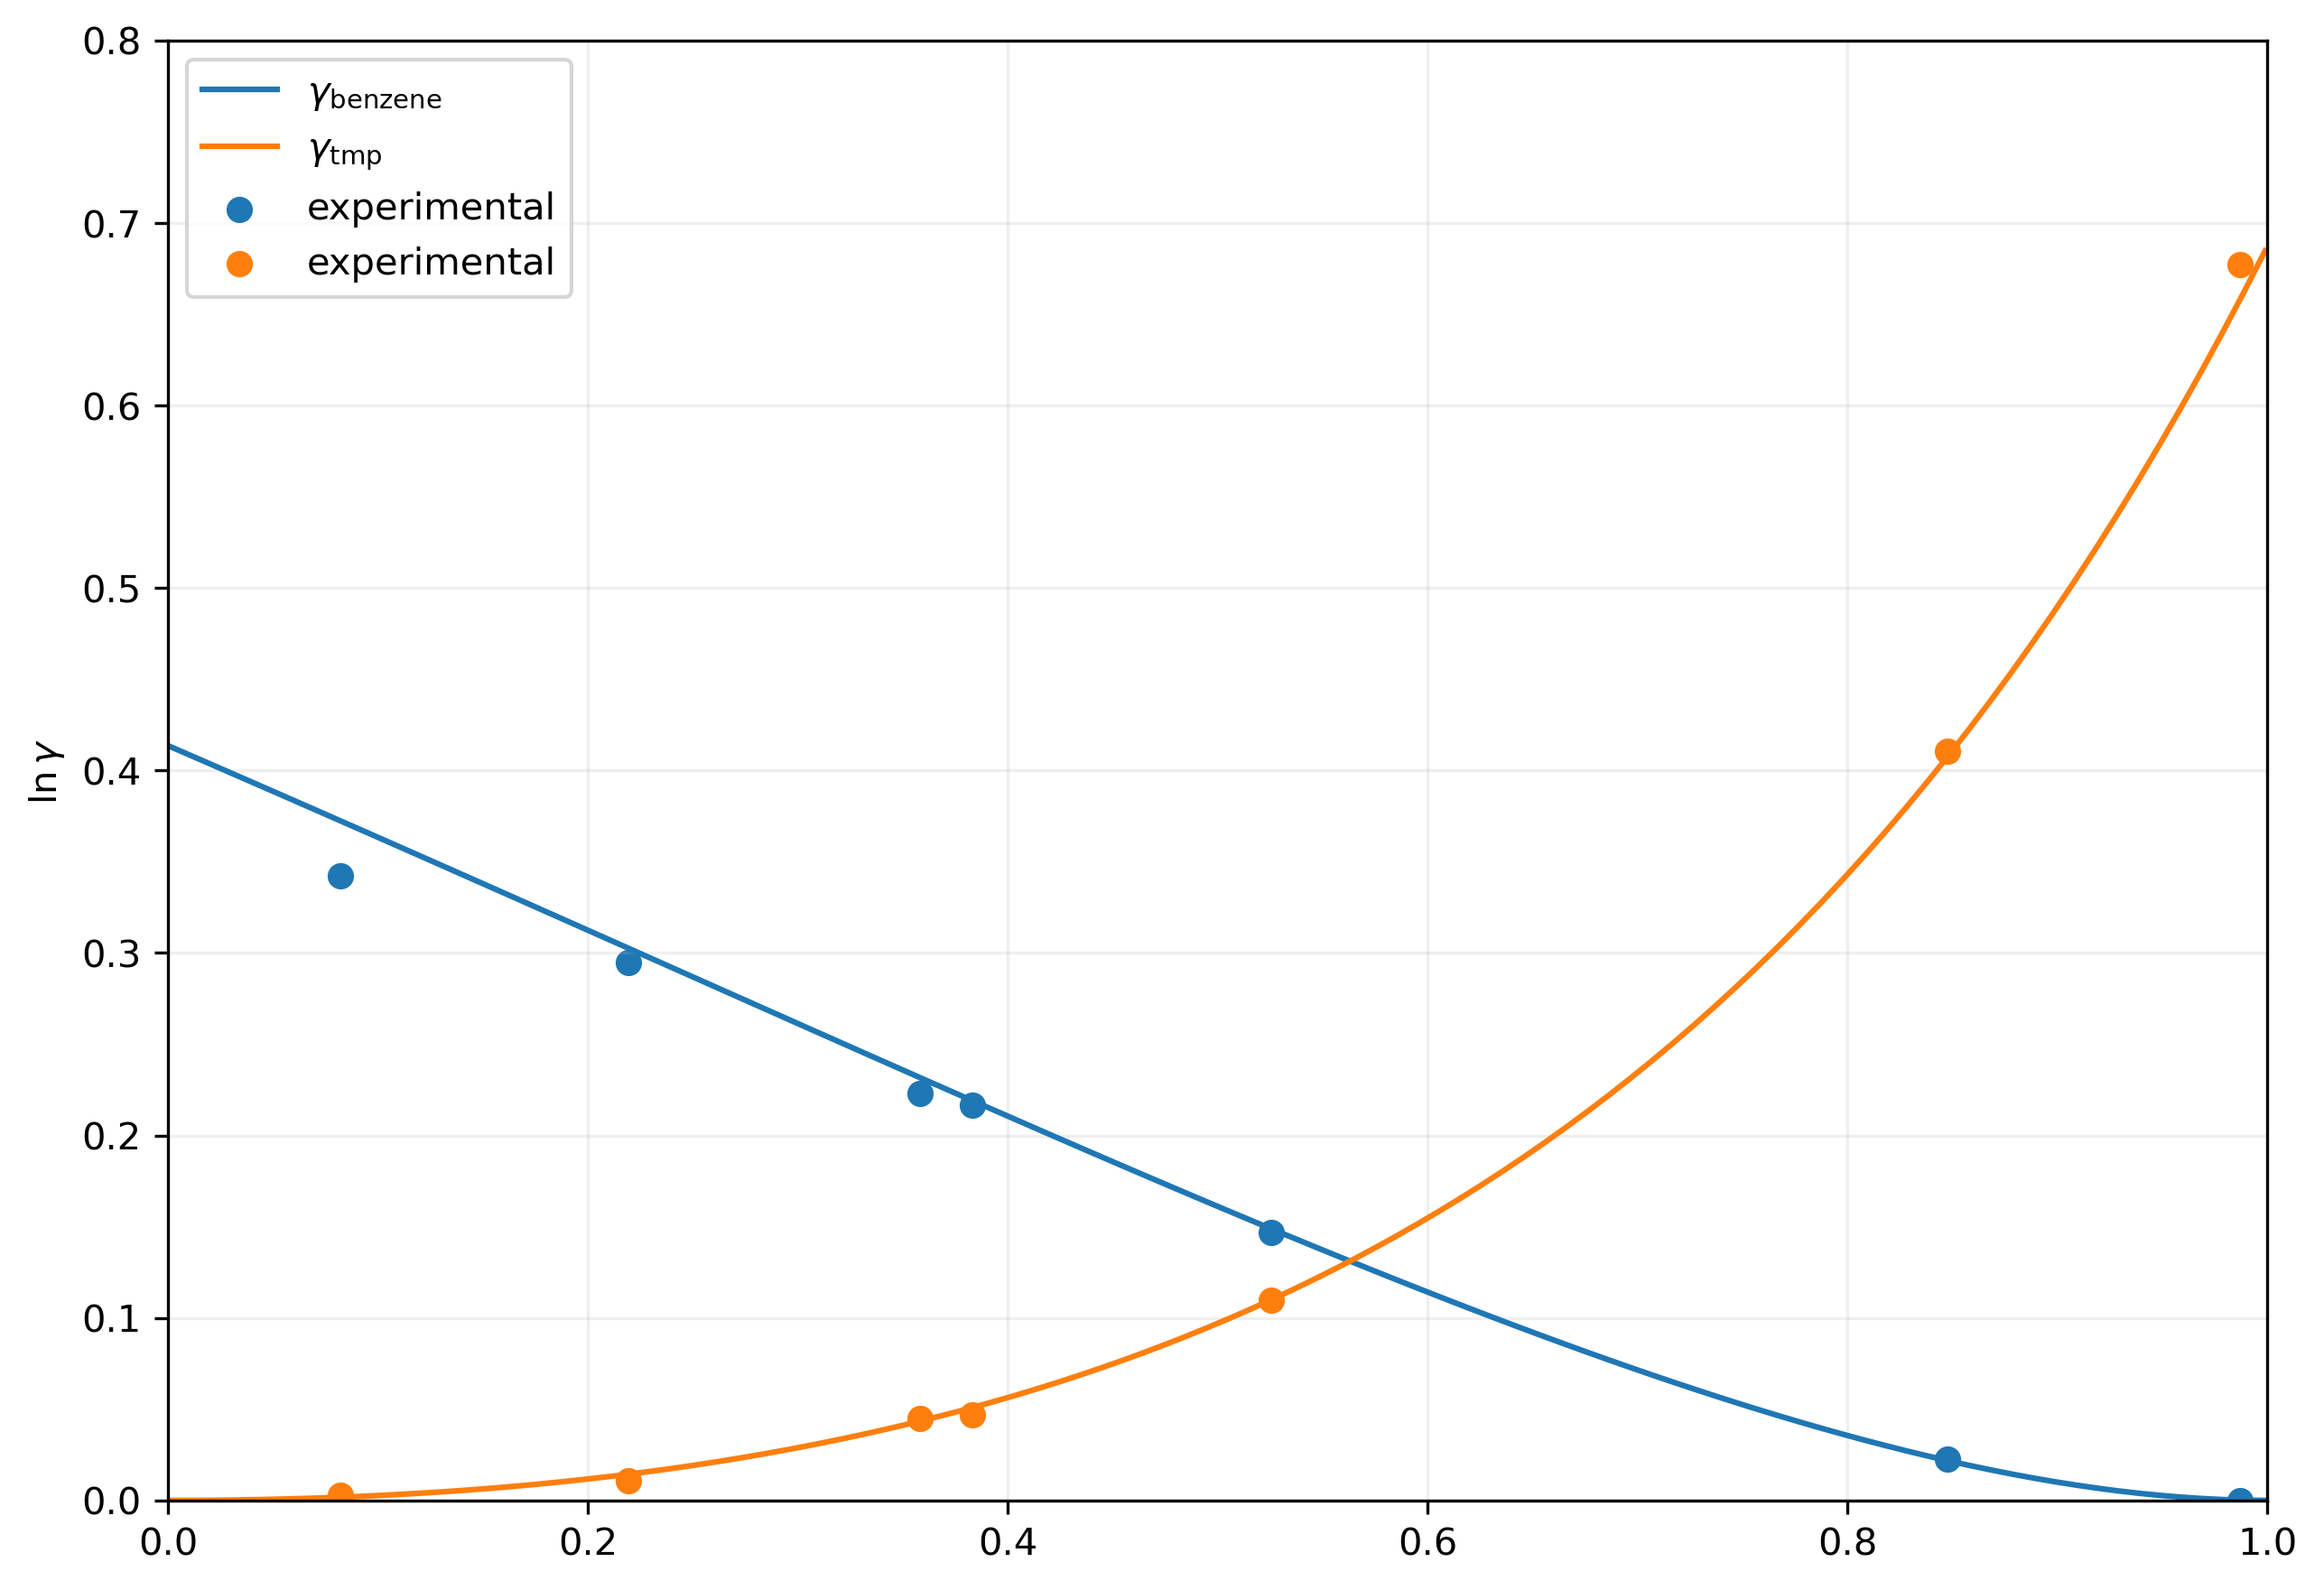

In [5]:
df = pd.read_csv('data.txt', sep=' ')
fig, ax = plt.subplots(figsize=(10,7), dpi=300, subplot_kw={'xlim':(0,1), 'ylim':(0,0.8), 'ylabel':'$\ln \gamma$'})

x1 = np.linspace(0.001,0.999,100)
y1 = van_laar1(x1, alpha, beta)
y2 = van_laar2(x1, alpha, beta)

plt.plot(x1, y1)
plt.plot(x1, y2)


plt.scatter(df['xb'], np.log(df['gb']))
plt.scatter(df['xb'], np.log(df['gtmp']))

ax.legend([r'$\gamma_{\text{benzene}}$', r'$\gamma_{\text{tmp}}$', 'experimental', 'experimental'])
ax.grid(alpha=0.2)

a much better fit

In [6]:
# filler